# Building Customer Segmentation Model

This project uses an [E-Commerce Dataset](https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download) from Kaggle that contains the information of transactions information between Dec 2010 and Dec 2011 from 4K+ customers.

Table of Contents:
1. Understanding The Segmentation Data
2. Preprocessing Data for Segmentation
3. Building The Customer Segmentation Model
4. Segmentation Model Interpretation and Visualization


## Step 1: Understand the Segmentation Data

In [1]:
import pandas as pd

df = pd.read_csv("E-Commerce_data.csv", encoding='unicode_escape')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Notice that CustomerID is read as a float, for which I'd like to read as string type instead.
I'd also like InvoiceDate to be datetime type.

In [3]:
# read the data and convert fields to desired data types
df = pd.read_csv("E-Commerce_data.csv", encoding='unicode_escape',
                dtype = {"CustomerID":"str"},
                parse_dates=["InvoiceDate"])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


## 2. Preprocessing Data for Segmentation

The informative features in this dataset that tell us about customer buying behavior include “Quantity”, “InvoiceDate” and “UnitPrice.” Using these variables, we are going to derive a customer’s RFM profile — Recency, Frequency, Monetary Value.

RFM is commonly used in marketing to evaluate a client’s value based on their:

- Recency: How recently have they made a purchase?
- Frequency: How often have they bought something?
- Monetary Value: How much money do they spend on average when making purchases?

With the variables in this e-commerce transaction dataset, we will calculate each customer’s recency, frequency, and monetary value. These RFM values will then be used to build the segmentation model.

### Recency

In [6]:
# keep only the most recent data of purchase for each customer
import numpy as np

df['rank'] = df.groupby('CustomerID').InvoiceDate.rank(method='min', ascending = False) #.astype(int)
df_rec = df[df['rank']==1]
# In the dataframe just created, only kept rows with the most recent date for each customer. 

In [7]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074,United Kingdom,1.0
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074,United Kingdom,1.0
157,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074,United Kingdom,1.0
158,536384,21324,HANGING MEDINA LANTERN SMALL,6,2010-12-01 09:53:00,2.95,18074,United Kingdom,1.0
159,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,2010-12-01 09:53:00,2.95,18074,United Kingdom,1.0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.0


In [36]:
# test
df.query("CustomerID == '14520'").sort_values('InvoiceDate', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank
536869,581222,22197,POPCORN HOLDER,12,2011-12-08 09:46:00,0.85,14520,United Kingdom,1.0
536870,581222,20685,DOORMAT RED RETROSPOT,4,2011-12-08 09:46:00,8.25,14520,United Kingdom,1.0
536871,581222,85099B,JUMBO BAG RED RETROSPOT,30,2011-12-08 09:46:00,2.08,14520,United Kingdom,1.0
97395,544606,85099B,JUMBO BAG RED RETROSPOT,100,2011-02-22 09:15:00,1.65,14520,United Kingdom,4.0


In [8]:
df_rec['InvoiceDate'].min(), df_rec['InvoiceDate'].max()

(Timestamp('2010-12-01 09:53:00'), Timestamp('2011-12-09 12:50:00'))

In [9]:
# assign a recency score each customerID (the more recent the transaction, the higher the recency score)

df_rec['recency'] = (df_rec['InvoiceDate'] - df_rec['InvoiceDate'].min()).dt.days

C:\Users\lchen\AppData\Local\Temp\ipykernel_37952\3402512079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['InvoiceDate'] - df_rec['InvoiceDate'].min()).dt.days


In [10]:
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rank,recency
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2010-12-01 09:53:00,6.45,18074,United Kingdom,1.0,0
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074,United Kingdom,1.0,0
157,536384,22464,HANGING METAL HEART LANTERN,12,2010-12-01 09:53:00,1.65,18074,United Kingdom,1.0,0
158,536384,21324,HANGING MEDINA LANTERN SMALL,6,2010-12-01 09:53:00,2.95,18074,United Kingdom,1.0,0
159,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,2010-12-01 09:53:00,2.95,18074,United Kingdom,1.0,0


### Frequency
To calculate how many times has each customer made a purchase

In [11]:
df_freq = df.groupby('CustomerID').agg(frequency = ('InvoiceNo','nunique')).reset_index()
df_freq

,CustomerID,frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4367,18280,1
4368,18281,1
4369,18282,3
4370,18283,16


In [12]:
rec_freq = df_freq.merge(df_rec, on = 'CustomerID')
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,rank,recency
0,12346,2,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,United Kingdom,1.0,48
1,12347,7,581180,23497,CLASSIC CHROME BICYCLE BELL,12,2011-12-07 15:52:00,1.45,Iceland,1.0,371
2,12347,7,581180,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-07 15:52:00,2.08,Iceland,1.0,371
3,12347,7,581180,21064,BOOM BOX SPEAKER BOYS,24,2011-12-07 15:52:00,1.25,Iceland,1.0,371
4,12347,7,581180,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-12-07 15:52:00,0.85,Iceland,1.0,371


### Monetary value
calculate each user’s monetary value to understand the total amount they have spent on the platform

In [13]:
rec_freq['total_price'] = rec_freq.Quantity * rec_freq.UnitPrice

# m = rec_freq.groupby('CustomerID').agg(monetary_value = ('total_price','sum')).reset_index()
# rfm = m.merge(rec_freq, on = 'CustomerID' )
# finaldf = rfm[['CustomerID','recency','frequency','monetary_value']].drop_duplicates()


finaldf = rec_freq.assign(monetary_value = rec_freq.groupby('CustomerID').total_price.transform('sum'))\
                   [['CustomerID','recency','frequency','monetary_value']].drop_duplicates()


finaldf.head()

,CustomerID,recency,frequency,monetary_value
0,12346,48,2,-77183.60
1,12347,371,7,224.82
12,12348,298,4,310.00
15,12349,354,1,1757.55
88,12350,63,1,334.40


### Removing Outliers

To get a visual representation of outliers in the dataframe:

recency: 


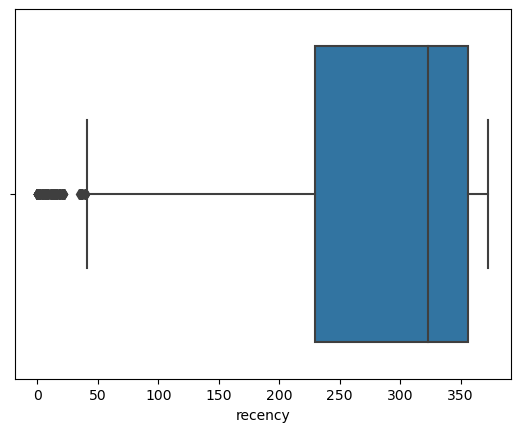

frequency: 


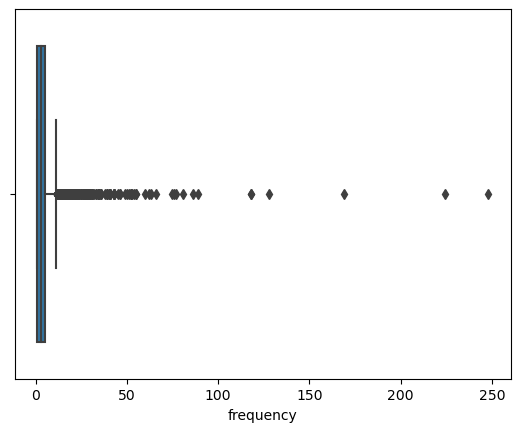

monetary_value: 


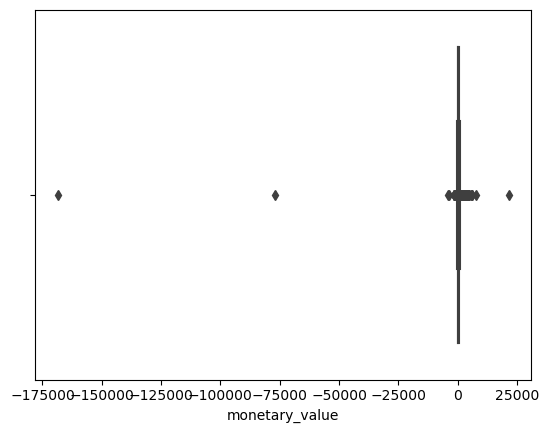

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics_list = ['recency','frequency','monetary_value']

for metric in metrics_list:
    print(metric + ": ")
    ax = sns.boxplot(data = finaldf, x=metric)
    plt.show()

Notice that “recency” is the only variable that doesn't have many visible outliers. “Frequency” and “monetary_value” have many outliers that must be removed before proceeding to build the model.

To identify outliers, we will compute a measurement called a Z-Score. Z-Scores tell us how far away from the mean a data point is. A Z-Score of 3, for instance, means that a value is 3 standard deviations away from the variable’s mean.

We are going to remove every data point with a Z-Score>=3):

In [15]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]

# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

recency: 


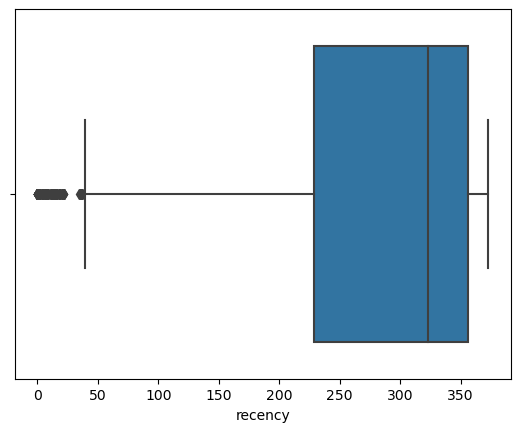

frequency: 


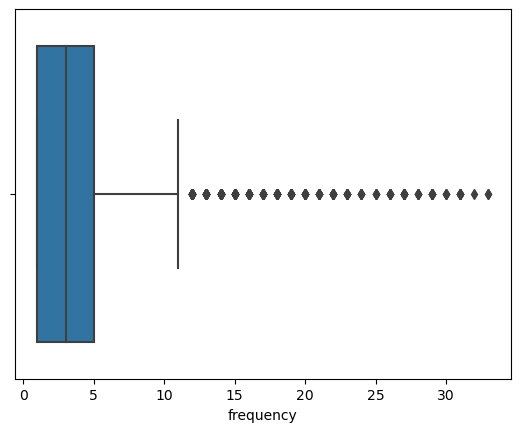

monetary_value: 


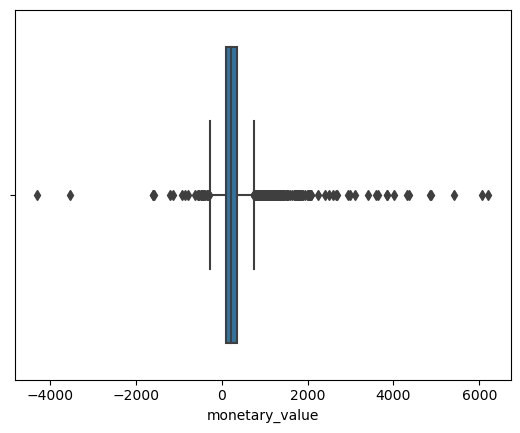

In [16]:
# visualize outliers again
for metric in metrics_list:
    print(metric + ": ")
    ax = sns.boxplot(data = new_df, x=metric)
    plt.show()

### Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

scaled_features.head()

,recency,frequency,monetary_value
0,0.899017,0.539499,-0.156180
1,0.174886,-0.075924,0.053898
2,0.730384,-0.691346,3.623979
3,-2.156220,-0.691346,0.114076
4,0.561750,1.360063,0.058165


## 3. Building The Customer Segmentation Model

we are going to create a K-Means clustering algorithm to perform customer segmentation.

The goal of a K-Means clustering model is to segment all the data available into non-overlapping sub-groups that are distinct from each other.

When building a clustering model, we need to decide how many segments we want to group the data into. This is achieved by a heuristic called the elbow method.

We will create a loop and run the K-Means algorithm from 1 to 10 clusters. Then, we can plot model results for this range of values and select the elbow of the curve as the number of clusters to use.

Text(0, 0.5, 'Inertia')

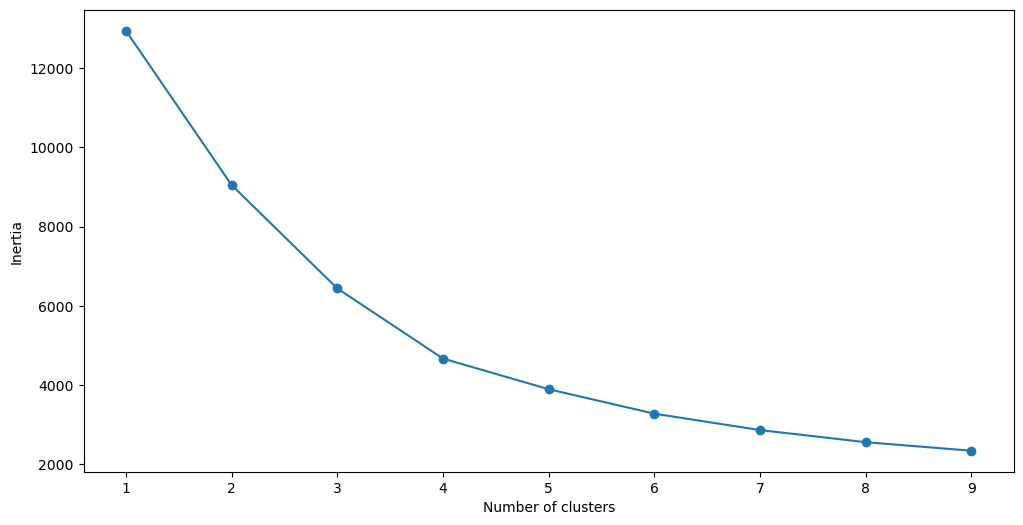

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, n_init=10 ) # init='k-means++'
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The “elbow” of this graph is the point of inflection on the curve, and in this case is at the 4-cluster mark.

This means that the optimal number of clusters to use in this K-Means algorithm is 4. Let’s now build the model with 4 clusters:

In [28]:
# First, build a model with 4 clusters
kmeans = KMeans(n_clusters = 4, n_init=10)
kmeans.fit(scaled_features)

KMeans(n_clusters=4, n_init=10)

In [29]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.47218185827520626


The silhouette coefficient of this model is 0.47, indicating reasonable cluster separation.

## 4. Segmentation Model Interpretation and Visualization

In [22]:
# Now that we have built our segmentation model, we need to assign clusters to each customer in the dataset
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [23]:
frame.head()

,recency,frequency,monetary_value,cluster
1,371,7,224.82,0
12,298,4,310.00,0
15,354,1,1757.55,3
88,63,1,334.40,2
105,337,11,311.73,1


Then we must **visualize our data** to identify the distinct traits of customers in each segment:

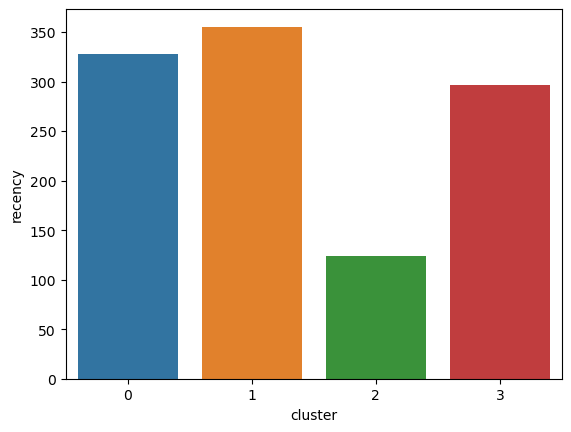

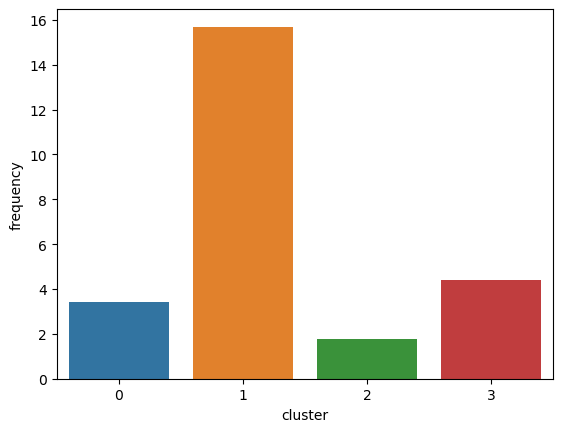

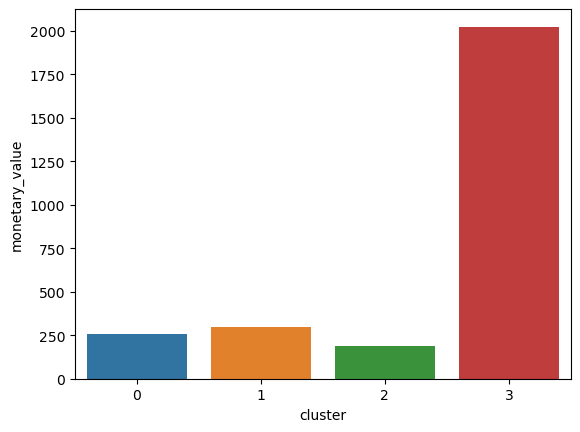

In [24]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()

for metric in metrics_list:
    sns.barplot(x='cluster',y= metric, data=avg_df)
    plt.show()

By looking at the charts above, we can identify the following attributes of customers in each segment:

Cluster Customer Atributes


- Customers in segment 0 have high recency, but moderate frequency and monetary value scores. These are people who make occasional purchases and are likely to visit the platform only when they have a specific product they'd like to buy.


- Customers in segment 1 have high recency and have been seen making orders very frequently in the past. Their monetary value is not very impressive though, which might indicate their indivisual orders involved limited number or low-price products. 


- Customers in segment 2 have the lowest recency, frequency, and montary value scores. This might indicate several things — they were not interested in the products sold, or they were disappointed with the service and switched to a competitor platform, or their customer ID changed as they re-registered onto the platform with different credentials. 


- Customers in segment 3 are seen making purchase orders often and have visited the platform recently. Their monetary value is extremely high, indicating that they spend a lot when shopping online.This could mean that users in this segment might make multiple purchases in a single order and are highly responsive to cross-selling and up-selling. Resellers who purchase products in bulk could also be part of this segment.